## *ESTUDO DIRIGIDO - CONTROLE E AUTOMAÇÃO 2025.2*
### Livro texto da disciplina: Sistemas de Controle Modernos - 8a Edição


Aluno: João Marcos Amorim de Almeida

# Capitulo 4: Características de Sistemas de Controle com *retroação*

Este capítulo aborda conceitos essenciais de modelagem de sistemas de controle, incluindo sensibilidade a incertezas do modelo, erros de estado estacionário e características da resposta transitória. Também explora a sensibilidade do sistema a variações de parâmetros, visando minimizar os efeitos de mudanças indesejadas.

## Sistemas de Controle em Malha Aberta e Malha Fechada
Um sistema de controle consiste na interligação de componentes para alcançar uma saída desejada. Quando a resposta real difere da desejada, um sinal proporcional ao erro é gerado e utilizado para ajustar o processo. Esse mecanismo de correção, conhecido como retroação, caracteriza os sistemas de malha fechada. Um exemplo é o controle do ritmo cardíaco humano.

## Sensibilidade a Variações de Parâmetros
A sensibilidade de um sistema refere-se à sua capacidade de detectar mudanças na saída devido a alterações nos parâmetros do processo. Sistemas com retroação reduzem o impacto dessas variações, aumentando a robustez do controle.

## Resposta Transitória
A resposta transitória descreve o comportamento do sistema ao longo do tempo. Como o objetivo é alcançar uma resposta desejada, ela deve ser ajustada até se tornar satisfatória. Enquanto sistemas de malha aberta exigem a substituição do processo para melhorar a resposta, sistemas de malha fechada permitem ajustes por meio dos parâmetros de retroação.

##Sinais de Perturbação
Perturbações são sinais indesejáveis que afetam a saída do sistema. Sistemas com retroação são eficazes em reduzir os efeitos de distorções, ruídos e perturbações externas, garantindo maior precisão na saída.

In [22]:
## Instalando a biblioteca utilizada para as simulações
!pip install control


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [23]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [24]:
R = 20.0e3; C=10.0e-6; tau=R*C;
Tsim=1.;

numerador = [1/tau]; denominador = [1., 1/tau]
P_s = ctl.tf(numerador, denominador)
print(' FT malha aberta= ' ,P_s)

 FT malha aberta=  <TransferFunction>: sys[147]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    5
  -----
  s + 5


In [25]:
C_s=ctl.tf([3.],[1.])
print(' FT controlador= ' ,C_s)

 FT controlador=  <TransferFunction>: sys[148]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  3
  -
  1


 FT malha fechada=  <TransferFunction>: sys[151]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    15
  ------
  s + 20


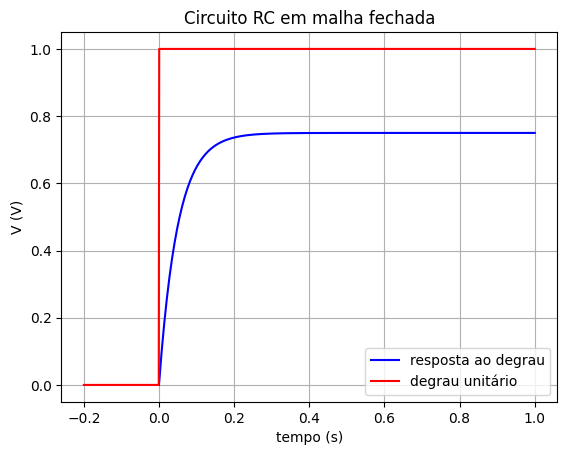

In [26]:
H_s=ctl.tf([1.],[1.])

# Função de transferência sistema
# G1_s = (C_s * P_s) / (1 + C_s * P_s * H_s)
G_s=ctl.series(C_s, P_s);
G1_s=ctl.feedback(G_s, H_s, sign=-1);
print(' FT malha fechada= ' ,G1_s)
T_mf, yout_mf = ctl.step_response(G1_s, Tsim)
T2=np.linspace(-0.2,Tsim,1000)
degrau=np.ones_like(T2)
degrau[T2<0]=0;
plt.plot(T_mf,yout_mf,'b-')
plt.plot(T2,degrau,'r-')
plt.ylabel('V (V)'); plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau','degrau unitário'])
plt.title('Circuito RC em malha fechada'); plt.grid()

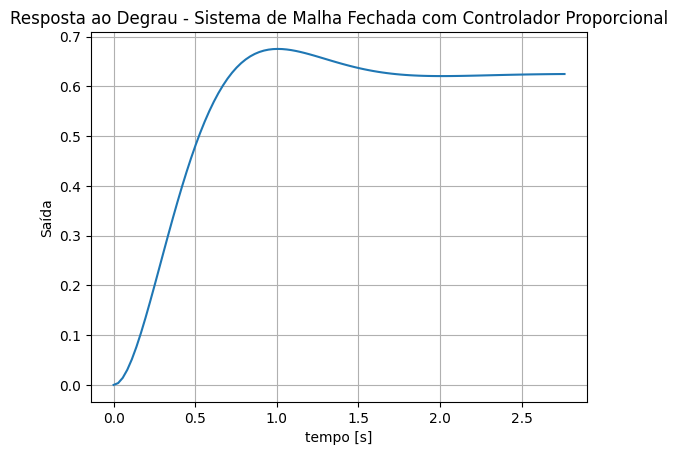

In [27]:
# Parâmetros do sistema
num = [1]
den = [1, 5, 6]

# Função de transferência do sistema
G = ctl.tf(num, den)

# Controlador proporcional
Kp = 10
C = ctl.tf([Kp], [1])

# Sistema de malha fechada
G_closed = ctl.feedback(C * G)

# Resposta ao degrau
t, y = ctl.step_response(G_closed)

# Plot da resposta ao degrau
plt.plot(t, y)
plt.title('Resposta ao Degrau - Sistema de Malha Fechada com Controlador Proporcional')
plt.xlabel('tempo [s]')
plt.ylabel('Saída')
plt.grid()
plt.show()

FT malha aberta = <TransferFunction>: sys[163]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1


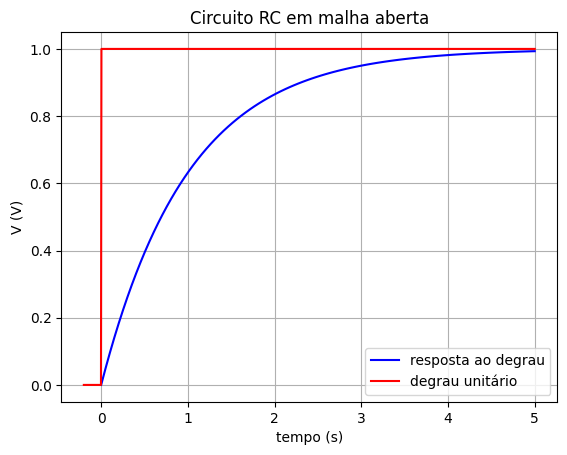

In [28]:
# Função de transferência do controlador e do sistema (exemplo de sistema de primeira ordem)
C_s = ctl.tf([1.0], [1.0])  # Controlador
P_s = ctl.tf([1.0], [1.0, 1.0])  # Planta

# Sistema em malha aberta
G_open = ctl.series(C_s, P_s)
print('FT malha aberta =', G_open)

# Simulação da resposta ao degrau
Tsim = 5  # Tempo de simulação
T_oa, yout_oa = ctl.step_response(G_open, Tsim)

# Criação do degrau unitário
T2 = np.linspace(-0.2, Tsim, 1000)
degrau = np.ones_like(T2)
degrau[T2 < 0] = 0

# Plot da resposta ao degrau
plt.plot(T_oa, yout_oa, 'b-')
plt.plot(T2, degrau, 'r-')
plt.ylabel('V (V)')
plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau', 'degrau unitário'])
plt.title('Circuito RC em malha aberta')
plt.grid()
plt.show()

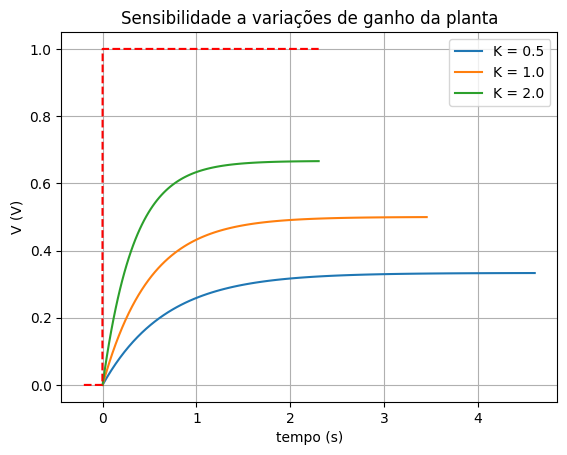

In [29]:
# Definir a planta nominal (sistema original)
K_nominal = 1.0
P_s_nominal = ctl.tf([K_nominal], [1.0, 1.0])  # Planta nominal

# Controlador (exemplo de controlador proporcional)
C_s = ctl.tf([1.0], [1.0])

# Sistema em malha fechada nominal
G_nominal = ctl.series(C_s, P_s_nominal)
G1_nominal = ctl.feedback(G_nominal)

# Variar o ganho da planta para analisar a sensibilidade
K_varied = [0.5, 1.0, 2.0]
responses = []

for K in K_varied:
    P_s_varied = ctl.tf([K], [1.0, 1.0])  # Planta com ganho variado
    G_varied = ctl.series(C_s, P_s_varied)
    G1_varied = ctl.feedback(G_varied)
    T, yout = ctl.step_response(G1_varied)
    responses.append((T, yout, f'K = {K}'))

# Plot das respostas ao degrau para diferentes ganhos da planta
plt.figure()
for T, yout, label in responses:
    plt.plot(T, yout, label=label)

# Plot do degrau unitário
T2 = np.linspace(-0.2, max(T), 1000)
degrau = np.ones_like(T2)
degrau[T2 < 0] = 0
plt.plot(T2, degrau, 'r--')

# Configurações do gráfico
plt.ylabel('V (V)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.title('Sensibilidade a variações de ganho da planta')
plt.grid()
plt.show()

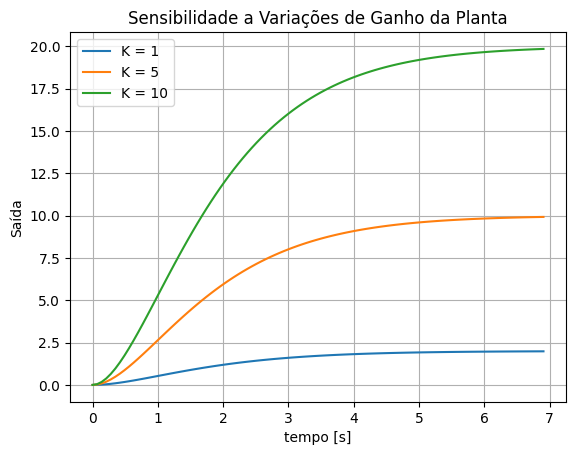

In [30]:
# Parâmetros do sistema
num = [2]
den = [1, 2, 1]

# Função de transferência do sistema
G = ctl.tf(num, den)

# Ganhos variáveis
gains = [1, 5, 10]
for K in gains:
    G_var = K * G
    t, y = ctl.step_response(G_var)
    plt.plot(t, y, label=f'K = {K}')

plt.title('Sensibilidade a Variações de Ganho da Planta')
plt.xlabel('tempo [s]')
plt.ylabel('Saída')
plt.legend()
plt.grid()
plt.show()

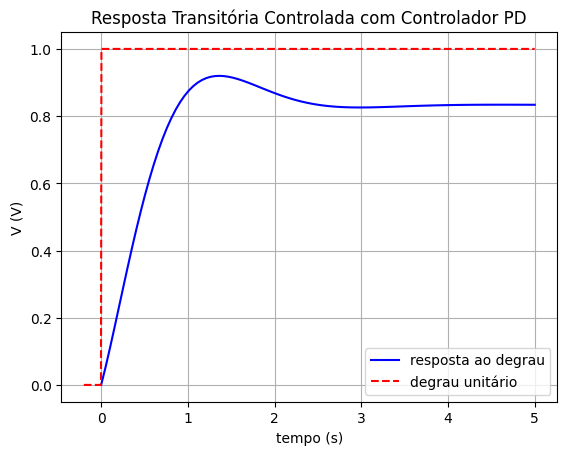

Informações da resposta transitória:
RiseTime: 0.65
SettlingTime: 2.23
SettlingMin: 0.76
SettlingMax: 0.92
Overshoot: 10.38
Undershoot: 0.00
Peak: 0.92
PeakTime: 1.35
SteadyStateValue: 0.83


In [31]:
# Planta do sistema (sistema de segunda ordem simples)
P_s = ctl.tf([1.0], [1.0, 2.0, 1.0])  # Planta sem controlador

# Controlador PD
Kp = 5.0  # Ganho proporcional
Kd = 1.0  # Ganho derivativo
C_s = ctl.tf([Kd, Kp], [1.0])  # Controlador PD

# Sistema em malha fechada
G_s = ctl.series(C_s, P_s)
G1_s = ctl.feedback(G_s)

# Resposta ao degrau do sistema em malha fechada
Tsim = 5  # Tempo de simulação
T, yout = ctl.step_response(G1_s, Tsim)

# Criação do degrau unitário
T2 = np.linspace(-0.2, Tsim, 1000)
degrau = np.ones_like(T2)
degrau[T2 < 0] = 0

# Plot da resposta ao degrau
plt.plot(T, yout, 'b-')
plt.plot(T2, degrau, 'r--')
plt.ylabel('V (V)')
plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau', 'degrau unitário'])
plt.title('Resposta Transitória Controlada com Controlador PD')
plt.grid()
plt.show()

# Análise da resposta transitória
info = ctl.step_info(G1_s)
print('Informações da resposta transitória:')
for key, value in info.items():
    print(f'{key}: {value:.2f}')

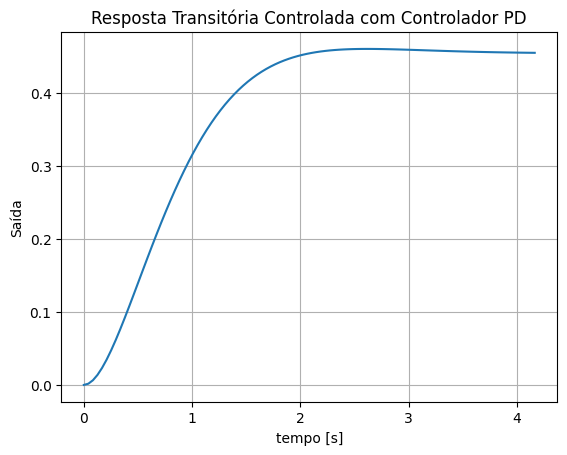

In [32]:
# Parâmetros do sistema
num = [1]
den = [1, 6, 11, 6]

# Função de transferência do sistema
G = ctl.tf(num, den)

# Controlador PD
Kp = 5
Kd = 2
C = ctl.tf([Kd, Kp], [1])

# Sistema de malha fechada
G_PD = ctl.feedback(C * G)

# Resposta ao degrau
t, y = ctl.step_response(G_PD)

# Plot da resposta ao degrau
plt.plot(t, y)
plt.title('Resposta Transitória Controlada com Controlador PD')
plt.xlabel('tempo [s]')
plt.ylabel('Saída')
plt.grid()
plt.show()

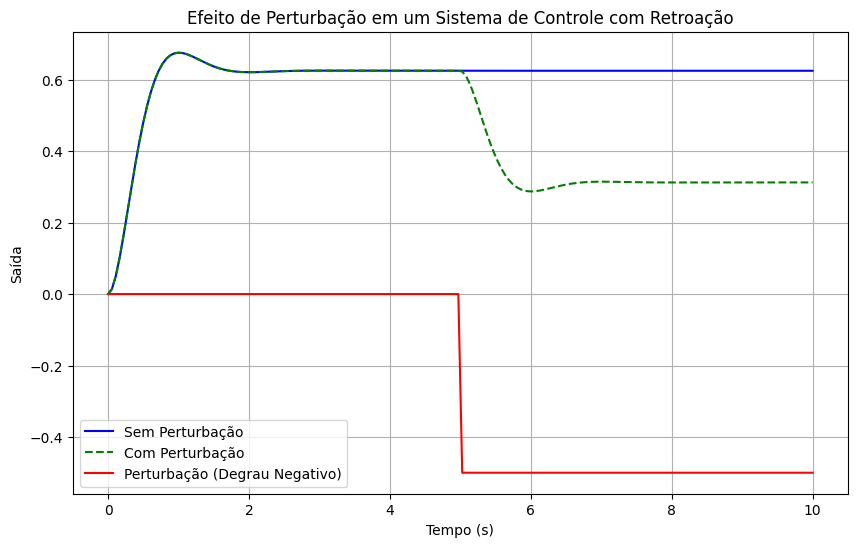

In [33]:
# Definir a planta do sistema
P_s = ctl.tf([1.0], [1.0, 5.0, 6.0])  # Planta de segunda ordem

# Controlador proporcional simples
Kp = 10.0  # Ganho proporcional
C_s = ctl.tf([Kp], [1.0])

# Sistema em malha fechada (com retroação)
G_s = ctl.series(C_s, P_s)
G1_s = ctl.feedback(G_s)

# Simular a resposta ao degrau sem perturbação
Tsim = 10  # Tempo de simulação
T, yout_no_disturbance = ctl.step_response(G1_s, Tsim)

# Adicionar uma perturbação (um degrau negativo) ao sistema
T_disturbance = T  # Usar o mesmo tempo que a resposta ao degrau
disturbance = -0.5 * (T_disturbance > 5)  # Degrau negativo começando em t=5s

# Resposta ao degrau com perturbação
_, yout_with_disturbance = ctl.forced_response(G1_s, T_disturbance, disturbance)

# Plot das respostas ao degrau
plt.figure(figsize=(10, 6))

# Resposta sem perturbação
plt.plot(T, yout_no_disturbance, 'b-', label='Sem Perturbação')

# Resposta com perturbação
plt.plot(T, yout_no_disturbance + yout_with_disturbance, 'g--', label='Com Perturbação')

# Perturbação aplicada ao sistema
plt.plot(T_disturbance, disturbance, 'r-', label='Perturbação (Degrau Negativo)')

# Configurações do gráfico
plt.ylabel('Saída')
plt.xlabel('Tempo (s)')
plt.legend(loc='best')
plt.title('Efeito de Perturbação em um Sistema de Controle com Retroação')
plt.grid()
plt.show()

/tmp/ipykernel_9/2736879602.py:40: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/t, yc)


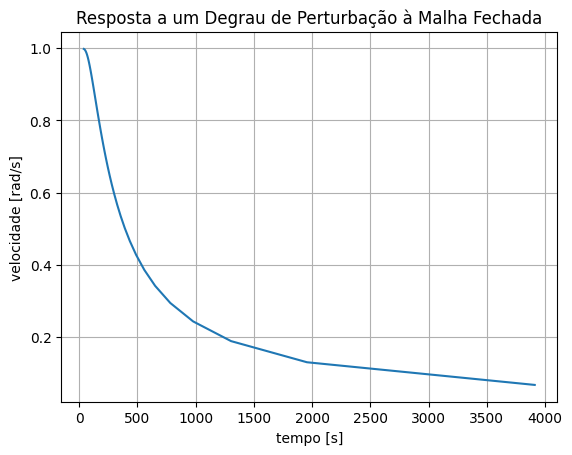

Erro de estado estacionário: 0.9980849972522448


In [34]:
# Definindo os parâmetros do sistema
Ra = 1
Km = 10
J = 2
b = 0.5
Kb = 0.1
Ka = 54
Kt = 1

num1 = [1]
den1 = [J, b]

num2 = [Ka * Kt]
den2 = [1]

num3 = [Kb]
den3 = [1]

num4 = [Km / Ra]
den4 = [1]

# Criando as funções de transferência
G1 = ctl.tf(num1, den1)
G2 = ctl.tf(num2, den2)
G3 = ctl.tf(num3, den3)
G4 = ctl.tf(num4, den4)

# Combinação em série das funções de transferência
G_series = ctl.series(G1, G2)
G_parallel = ctl.parallel(G3, G4)

# Função de transferência final com retroação
G_open_loop = G_series * G_parallel
G_closed_loop = ctl.feedback(G_open_loop)

# Cálculo da resposta ao degrau da perturbação
t, yc = ctl.step_response(G_closed_loop)

# Plot da resposta ao degrau
plt.plot(1/t, yc)
plt.title('Resposta a um Degrau de Perturbação à Malha Fechada')
plt.xlabel('tempo [s]')
plt.ylabel('velocidade [rad/s]')
plt.grid()
plt.show()

# Erro de estado estacionário (último valor de saída)
erro_estacionario = yc[-1]
print(f"Erro de estado estacionário: {erro_estacionario}")

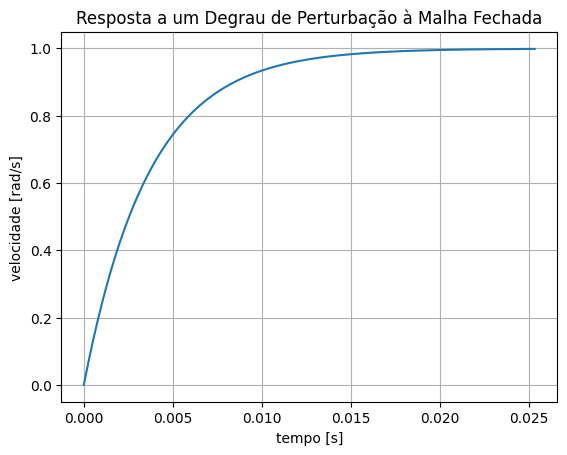

Erro de estado estacionário: 0.9980849972522448


In [35]:
# Definindo os parâmetros do sistema
Ra = 1
Km = 10
J = 2
b = 0.5
Kb = 0.1
Ka = 54
Kt = 1

num1 = [1]
den1 = [J, b]

num2 = [Ka * Kt]
den2 = [1]

num3 = [Kb]
den3 = [1]

num4 = [Km / Ra]
den4 = [1]

# Criando as funções de transferência
G1 = ctl.tf(num1, den1)
G2 = ctl.tf(num2, den2)
G3 = ctl.tf(num3, den3)
G4 = ctl.tf(num4, den4)

# Combinação em série das funções de transferência
G_series = ctl.series(G1, G2)
G_parallel = ctl.parallel(G3, G4)

# Função de transferência final com retroação
G_open_loop = G_series * G_parallel
G_closed_loop = ctl.feedback(G_open_loop)

# Cálculo da resposta ao degrau da perturbação
t, yc = ctl.step_response(G_closed_loop)

# Plot da resposta ao degrau
plt.plot(t, yc)
plt.title('Resposta a um Degrau de Perturbação à Malha Fechada')
plt.xlabel('tempo [s]')
plt.ylabel('velocidade [rad/s]')
plt.grid()
plt.show()

# Erro de estado estacionário (último valor de saída)
erro_estacionario = yc[-1]
print(f"Erro de estado estacionário: {erro_estacionario}")